<a href="https://colab.research.google.com/github/giaranjan/morse/blob/main/MORSE_PART_2_(PIC_TO_MORSE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MORSE CONVERTER WITH PICTURE INPUT

### User inputs an image and this code extracts text from the image and then converts it to morse and then displays the output morse as either text or audio.

### **Part of my larger cross modal morse converter project.**

Some Resources:

My own Github

https://nanonets.com/blog/deep-learning-ocr/

https://medium.com/artificialis/how-to-extract-text-from-any-image-with-deep-learning-e834d5a9863e

https://medium.com/artificialis/hydra-ai-accurately-extract-text-from-any-image-6dfc8abd710a

https://www.analyticsvidhya.com/blog/2022/09/extract-text-from-images-quickly-using-keras-ocr-pipeline/

https://www.hackersrealm.net/post/image-to-text-conversion-extraction-using-python

https://towardsdatascience.com/image-to-text-ocr-with-tesseract-js-3540b420e0e7

https://towardsdatascience.com/extract-text-from-image-using-python-8e8cfbbce743

https://neptune.ai/blog/15-computer-visions-projects

https://www.youtube.com/watch?v=ZVKaWPW9oQY

## Step 1: EXTRACTING TEXT FROM PICTURE

In [ ]:
# 1. Input a pictyre using ipywidgets
# 2. Perform OCR text extraction using 3 methods
# 3. Display the extracted text and annotated image as output for all 3 methods
# 4. Ask for user's choice on which method they want to proceed with
# 5. Display the annotated image and extracted text of the chosen method
# 6. Ask the user if they are satisfied with the extracted text:
#    6a. If they say yes and click submit the nothing changes and the extracted text remains same
#    6b. If they say no and click submit, they will get a text box where they can edit the extracted
#    text and then press 'i am all done' when they are ready to go. The editted version is now the
#    extracted text that will be used for the rest of the code.
# 7. Display the final text that will now be used for the rest of the code

# 8. Morse begins from Part 1

In [ ]:
# Next Step:
# 1. adjust the loop so it can accept another input if someone responds yes to - would you like to convert more.

In [ ]:
# Step 1: Install Required Libraries 📚

!apt install tesseract-ocr
!pip install pytesseract
!pip install pillow
!pip install easyocr
!pip install keras-ocr
!pip install ipywidgets

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,152 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
# Step 2: Import Libraries 📝

from PIL import Image
from PIL import ImageDraw
import pytesseract
import easyocr
import keras_ocr
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from IPython.display import display
import io
from PIL import ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import Button

In [ ]:
# Step 3: Upload Image using ipywidgets 🖼️

uploader = widgets.FileUpload(
    accept='image/*',
    multiple=False
)
display(uploader)

FileUpload(value={}, accept='image/*', description='Upload')

In [ ]:
# To extract the uploaded file, you can use:

uploaded = uploader.value
image_file_name = next(iter(uploaded))

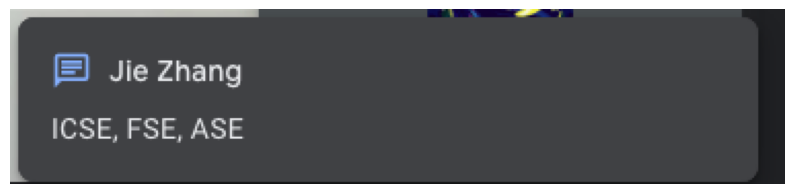

In [ ]:
# Step 4: Display Uploaded Image 🖼️👀

# Convert bytes to an image
image = Image.open(io.BytesIO(uploaded[image_file_name]['content']))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)
ax.axis('off')
plt.show()

In [ ]:
# Step 5: Create OCR Functions for All Methods 🖥️📖

In [ ]:
# Method 1: pytesseract

def ocr_with_pytesseract(image):
    # Convert Image object to a NumPy array
    image_np = np.array(image)

    # Use Pytesseract to read the text from the array
    text = pytesseract.image_to_string(image)

    # Extract the raw data using pytesseract
    raw_data = pytesseract.image_to_data(image)

    return text.upper(), raw_data

In [ ]:
# Method 2: easyocr

def ocr_with_easyocr(image):

    # Initialize EasyOCR reader
    reader = easyocr.Reader(['en'])

    # Convert Image object to a NumPy array
    image_np = np.array(image)

    # Use EasyOCR to read the text from the array
    results = reader.readtext(image_np)

    # Extract and join the text
    extracted_text = " ".join([result[1] for result in results])

    return extracted_text.upper(), results

In [ ]:
# Method 3: keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

def ocr_with_keras_ocr(image):
    # Convert Image object to a NumPy array
    image_np = np.array(image)

    # Drop the alpha channel if it exists
    if image_np.shape[2] == 4:
        image_np = image_np[:, :, :3]

    # Use Keras OCR to read the text from the array
    results = pipeline.recognize([image_np])

    # Extract and join the text
    extracted_text = " ".join([result[0] for result in results[0]])

    return extracted_text.upper(), results

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
# Step 6: Run OCR for All Methods 🖥️📖

pytesseract_text = ocr_with_pytesseract(image)
easyocr_text, easyocr_results = ocr_with_easyocr(image)
keras_ocr_text, keras_ocr_results = ocr_with_keras_ocr(image)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

1/1 [==============================] - 3s 3s/step


Extracted Text using PYTESSARACT: ~ © J i e Z h a n g I C S E , F S E , A S E


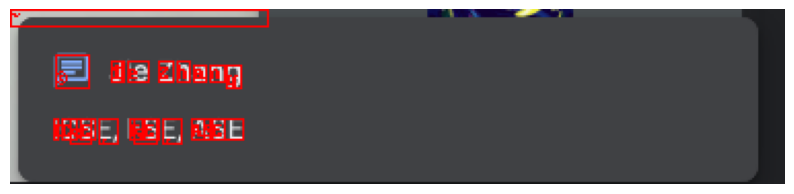

In [ ]:
# Step 7(a): Display Extracted Text and Annotated Image as Output for pytesseract 📝

def annotate_pytesseract(image):
    # Clone the image to annotate
    image_copy = image.copy()

    # Create draw object
    draw = ImageDraw.Draw(image_copy)

    # Get bounding boxes and extract text
    bounding_boxes = pytesseract.image_to_boxes(image_copy)

    # Initialize an empty list to collect the extracted text
    extracted_texts = []

    for box in bounding_boxes.splitlines():
        b = box.split()
        text = b[0]
        extracted_texts.append(text)
        coordinates = [(int(b[1]), int(image_copy.size[1] - int(b[2]))), (int(b[3]), int(image_copy.size[1] - int(b[4])))]

        # Draw rectangle
        draw.rectangle(coordinates, outline="red")

        # Draw text
        draw.text((coordinates[0][0], coordinates[0][1] - 10), text, fill="red")

    # Print the extracted text
    print(f"Extracted Text using PYTESSARACT: {' '.join(extracted_texts)}")

    return image_copy

# Run the modified function
pytesseract_annotated = annotate_pytesseract(image)

# Convert PIL Image to NumPy array for matplotlib display
pytesseract_annotated_np = np.array(pytesseract_annotated)

# Display the annotated image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(pytesseract_annotated_np)
ax.axis('off')
plt.show()


Extracted Text using EASYOCR: Jie Zhang ICSE, FSE, ASE


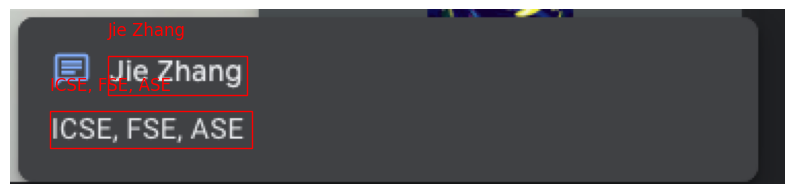

In [ ]:
# Step 7(b): Display Extracted Text and Annotated Image as Output for easyocr 📝

def annotate_easyocr(image, results):
    # Convert PIL Image to NumPy array
    image_np = np.array(image)

    fig, ax = plt.subplots(figsize=(10, 10))

    # Initialize an empty list to collect the extracted text
    extracted_texts = []

    for result in results:
        top_left = tuple(map(int, result[0][0]))
        bottom_right = tuple(map(int, result[0][2]))
        text = result[1]

        # Append the extracted text to the list
        extracted_texts.append(text)

        # Draw rectangle
        rect = patches.Rectangle(top_left, bottom_right[0] - top_left[0], bottom_right[1] - top_left[1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Draw text
        plt.text(top_left[0], top_left[1] - 10, text, fontsize=12, color='red')

    # Print the extracted text
    print(f"Extracted Text using EASYOCR: {' '.join(extracted_texts)}")

    ax.imshow(image_np)
    ax.axis('off')
    plt.show()

# Run the function
annotate_easyocr(image, easyocr_results)


Extracted Text using KERAS: jie zhang icse fse ase


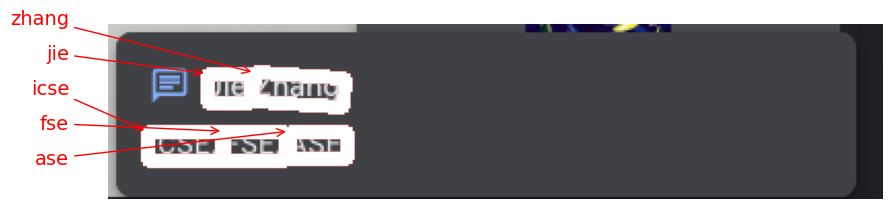

In [ ]:
# Step 7(c): Display Extracted Text and Annotated Image as Output for keras 📝

import keras_ocr.tools

def annotate_keras_ocr(image, results):
    # Convert PIL Image to a NumPy array
    image_np = np.array(image)

    # Create a matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Use Keras OCR's drawAnnotations function to annotate the image
    keras_ocr.tools.drawAnnotations(image=image_np, predictions=results[0], ax=ax)

    # Hide axis
    ax.axis('off')

    # Extract and print the text from the results
    extracted_text = " ".join([result[0] for result in results[0]])
    print(f"Extracted Text using KERAS: {extracted_text}")

    # Show the annotated image
    plt.show()

# Run the function
annotate_keras_ocr(image, keras_ocr_results)

In [ ]:
# user_choice = choose_method.value - can add this for better code reading if needed

RadioButtons(description='Choose OCR:', options=('pytesseract', 'easyocr', 'keras_ocr'), value='pytesseract')

Button(description='Submit', style=ButtonStyle())

1/1 [==============================] - 0s 56ms/step
Extracted text using Keras OCR: JIE ZHANG ICSE FSE ASE
Extracted Text using KERAS: jie zhang icse fse ase


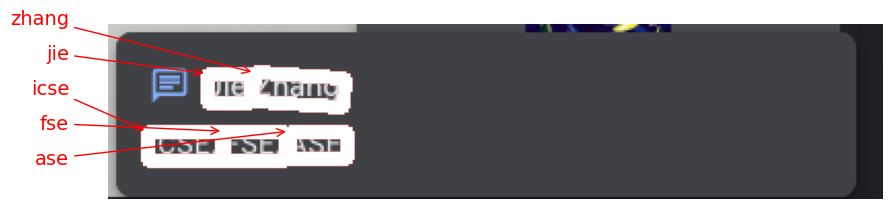

NameError: ignored

In [ ]:
# Step 8: User Choice to Select Method and Viewing Exctracted Text and Annotated Image from that Chosen Method🛠️

# Display the radio buttons for OCR choice
choose_method = widgets.RadioButtons(
    options=['pytesseract', 'easyocr', 'keras_ocr'],
    description='Choose OCR:',
    disabled=False
)
display(choose_method)

# Create a submit button
submit_button = Button(description="Submit")
display(submit_button)

# Initialize a variable to store the extracted text
extracted_text = ''

def on_submit_button_clicked(b):
    global extracted_text  # Make sure to use the global variable
    if choose_method.value == 'pytesseract':
        pytesseract_text, _ = ocr_with_pytesseract(image)
        extracted_text = pytesseract_text
        print(f'Extracted text using PyTesseract: {pytesseract_text}')
        pytesseract_annotated = annotate_pytesseract(image)

    elif choose_method.value == 'easyocr':
        easyocr_text, easyocr_results = ocr_with_easyocr(image)
        extracted_text = easyocr_text
        print(f'Extracted text using EasyOCR: {easyocr_text}')
        annotate_easyocr(image, easyocr_results)

    elif choose_method.value == 'keras_ocr':
        keras_ocr_text, keras_ocr_results = ocr_with_keras_ocr(image)
        extracted_text = keras_ocr_text
        print(f'Extracted text using Keras OCR: {keras_ocr_text}')
        annotate_keras_ocr(image, keras_ocr_results)

    # Now initialize your TextExtractionApp with the latest extracted_text
    app = TextExtractionApp(extracted_text)

submit_button.on_click(on_submit_button_clicked)

In [ ]:
# Step 9. Check if the Output from the Chosen Method is Satisfactory 🖼️🔍

from ipywidgets import widgets, HBox
from IPython.display import display

class TextExtractionApp:
    def __init__(self, initial_text):
        self.extracted_text = initial_text
        self.initialize_widgets()
        self.bind_events()
        self.display_initial_widgets()

    def get_extracted_text(self):  # Corrected the indentation here
        return self.extracted_text

    def initialize_widgets(self):
        self.satisfaction_check = widgets.RadioButtons(
            options=['Yes', 'No'],
            description='Satisfied with the extraction?',
            disabled=False
        )
        self.submit_button = widgets.Button(
            description='Submit',
            disabled=False,
            button_style='success',
        )
        self.text_editor = widgets.Textarea(
            value=self.extracted_text,
            placeholder='Edit the extracted text here',
            disabled=True
        )
        self.all_done_button = widgets.Button(
            description='I am all done',
            disabled=True,
            button_style='info',
        )

    def on_submit_clicked(self, b):
        if self.satisfaction_check.value == 'No':
            self.text_editor.disabled = False
            display(self.text_editor)
            self.all_done_button.disabled = False
            display(self.all_done_button)
        else:
            self.text_editor.disabled = True
            self.all_done_button.disabled = True
            self.print_final_text()  # New line to print the final text

    def on_all_done_clicked(self, b):
        self.extracted_text = self.text_editor.value
        self.print_final_text()  # New line to print the final text

    def print_final_text(self):
        print(f"Final extracted text: {self.extracted_text}")


    def bind_events(self):
        self.submit_button.on_click(self.on_submit_clicked)
        self.all_done_button.on_click(self.on_all_done_clicked)

    def display_initial_widgets(self):
        display(self.satisfaction_check)
        display(self.submit_button)
        self.text_editor.value = self.extracted_text  # Explicitly set the value
        display(self.text_editor)


initial_text = extracted_text
app = TextExtractionApp(initial_text)

# Get the final text
final_text = app.get_extracted_text()

RadioButtons(description='Satisfied with the extraction?', options=('Yes', 'No'), value='Yes')

Button(button_style='success', description='Submit', style=ButtonStyle())

Textarea(value='JIE ZHANG ICSE FSE ASE', disabled=True, placeholder='Edit the extracted text here')

Textarea(value='JIE ZHANG ICSE FSE ASE', placeholder='Edit the extracted text here')

Button(button_style='info', description='I am all done', style=ButtonStyle())

Final extracted text: JIE ZHANG ICSE FSE ASE


## Step 2: CONVERTING EXTRACTED TEXT TO MORSE

In [ ]:
# Step 1: Installations 📦

!pip install gtts

In [ ]:
!apt-get install -y mpg321

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libao-common libao4 libaudio-scrobbler-perl libauthen-sasl-perl libclone-perl
  libconfig-inifiles-perl libdata-dump-perl libencode-locale-perl libfile-listing-perl
  libfont-afm-perl libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libid3tag0 libio-html-perl libio-socket-ssl-perl liblwp-mediatypes-perl
  liblwp-protocol-https-perl libmad0 libmailtools-perl libnet-http-perl libnet-smtp-ssl-perl
  libnet-ssleay-perl libtry-tiny-perl liburi-perl libwww-perl libwww-robotrules-perl netbase
  perl-openssl-defaults
Suggested packages:
  libaudio2 libsndio6.1 libdigest-hmac-perl libgssapi-perl libcrypt-ssleay-perl libsub-name-perl
  libbusiness-isbn-perl libauthen-ntlm-perl
The following NEW 

In [ ]:
# Step 2: Import Libraries 📚

from gtts import gTTS
import time

In [ ]:
# Step 3: Morse Code Dictionary 📖

MORSE_CODE_DICT = { 'A':'.-', 'B':'-...',
                    'C':'-.-.', 'D':'-..', 'E':'.',
                    'F':'..-.', 'G':'--.', 'H':'....',
                    'I':'..', 'J':'.---', 'K':'-.-',
                    'L':'.-..', 'M':'--', 'N':'-.',
                    'O':'---', 'P':'.--.', 'Q':'--.-',
                    'R':'.-.', 'S':'...', 'T':'-',
                    'U':'..-', 'V':'...-', 'W':'.--',
                    'X':'-..-', 'Y':'-.--', 'Z':'--..',
                    '1':'.----', '2':'..---', '3':'...--',
                    '4':'....-', '5':'.....', '6':'-....',
                    '7':'--...', '8':'---..', '9':'----.',
                    '0':'-----', ', ':'--..--', '.':'.-.-.-',
                    '?':'..--..', '/':'-..-.', '-':'-....-',
                    '(':'-.--.', ')':'-.--.-'}

In [ ]:
# Step 4: Text to Morse Code Function 📝➡️🔠

def text_to_morse(text):
    morse_code = ''
    for letter in text:
        if letter != ' ':
            morse_code += MORSE_CODE_DICT[letter] + ' '
        else:
            morse_code += ' '

    return morse_code

In [ ]:
from IPython.display import Audio

In [ ]:
# Step 5: Text or Audio Function 🎵📝

def output_morse(morse_code, output_type):
    if output_type == 'text':
        print(morse_code)
    elif output_type == 'audio':
        tts = gTTS(text=morse_code, lang='en')
        tts.save("morse_code.mp3")
        display(Audio("morse_code.mp3", autoplay=True))

In [ ]:
# Step 6: Main Loop 🔄

while True:
    # 1. Ask for text to convert
    text_input = extracted_text.upper()

    # 2. Ask for output type (text or audio)
    output_type = input("Do you want the output as text or audio? ").lower()

    # 3. Convert and store Morse code
    morse_code = text_to_morse(text_input)

    # 4. Display the Morse code according to the chosen type
    output_morse(morse_code, output_type)

    # # 5. Ask if the user has more to convert - add this functionality later to loop back for further inputs if the user wants
    # another = input("Do you have any more text to convert? (yes/no): ").lower()

    # New line to wait for any key press - if needed
    input("Press any key to continue...")
    break

    # # 6. Decide to loop or exit based on user input
    # if another != 'yes':
    #     print("Bye Bye!")
    #     break

# while True:
#     text_input = input("Enter text to convert to Morse Code: ").upper()
#     output_type = input("Do you want the output as text or audio? ").lower()
#     morse_code = text_to_morse(text_input)

#     output_morse(morse_code, output_type)

#     another = input("Do you have any more text to convert? (yes/no): ").lower()

#     # # New line to wait for any key press
#     # input("Press any key to continue...")

#     if another != 'yes':
#         print("Bye Bye!")
#         break



Do you want the output as text or audio? text
.--- .. .  --.. .... .- -. --.  .. -.-. ... .  ..-. ... .  .- ... . 
Press any key to continue...
